# Load Control Data

This examples loads ands displays available control data. The control data should partly be made into their own diagnostics systems in the (near?!) future.

In [1]:
import nptdms
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
import numpy as np

In [2]:
path = "/mnt/c/Users/alec/Data/NORTH/InterferometerSim_2025/ControlData/"
shot = 9977

In [3]:
tdms_file = nptdms.TdmsFile.read(f"{path}/CRIO{shot}.tdms")

In [4]:
# List the structure of the TDMS file: groups and channels
for group in tdms_file.groups():
    print(f"Group: {group.name}")
    for channel in group.channels():
        print(f"  Channel: {channel.name}")

Group: Data
  Channel: Temperature
  Channel: Light
  Channel: Microwave Power
  Channel: Pressure
  Channel: I_TF
  Channel: Reflected Power
  Channel: Time
  Channel: HFS Reflected Power
  Channel: HFS Power
  Channel: Req Power
  Channel: shot
  Channel: Manarm
  Channel: Gas
  Channel: IPF1
  Channel: VPF1
  Channel: HFSset
  Channel: LFSset
  Channel: Geiger
  Channel: HighLevel
  Channel: TotelLevel
  Channel: Serie
  Channel: IBFdump
  Channel: IBFplasma


Text(0.5, 1.0, 'Toroidal Field Coil Current for Shot 9977')

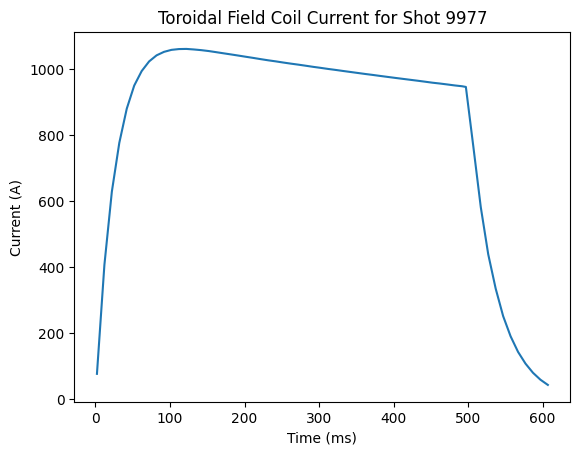

In [5]:
fig,ax = plt.subplots()
ax.plot(tdms_file['Data']['Time'][:], tdms_file['Data']['I_TF'][:])
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Current (A)")
ax.set_title(f"Toroidal Field Coil Current for Shot {shot}")

In [6]:
data = {}
data['gas_density'] = tdms_file['Data']['Pressure'][:]*100/(1.380649e-23*300)
data['gas_density_smooth'] = savgol_filter(data['gas_density'], window_length=11, polyorder=2)

Text(0.5, 1.0, 'Neutral Gas Pressure for Shot 9977')

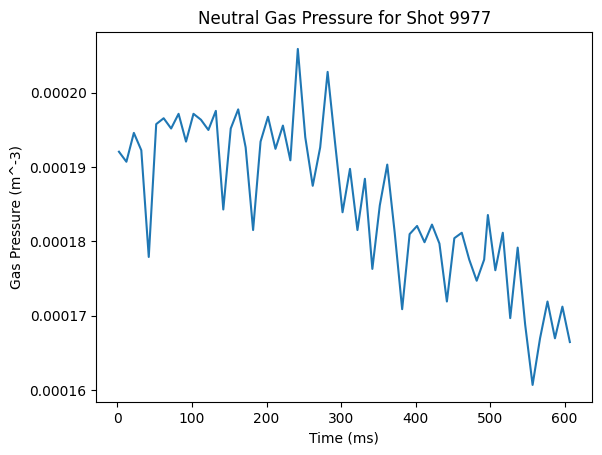

In [ ]:
fig,ax = plt.subplots()
ax.plot(tdms_file['Data']['Time'][:], tdms_file['Data']['Pressure'][:])
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Gas Pressure (mbar)")
ax.set_title(f"Neutral Gas Pressure for Shot {shot}")

Text(0.5, 1.0, 'Neutral Gas Density for Shot 9977')

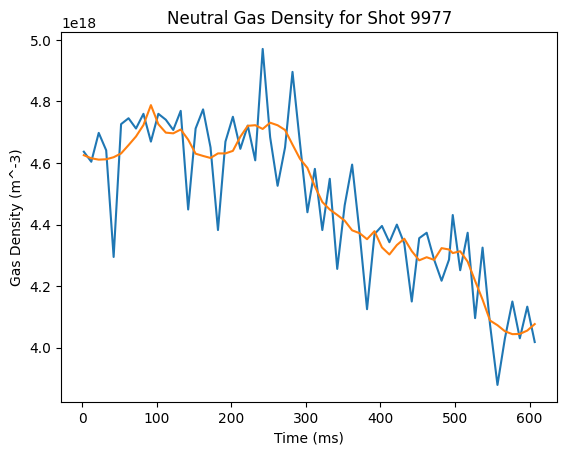

In [8]:
fig,ax = plt.subplots()
ax.plot(tdms_file['Data']['Time'][:], data['gas_density'])
ax.plot(tdms_file['Data']['Time'][:], data['gas_density_smooth'], label='Smoothed')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Gas Density (m^-3)")
ax.set_title(f"Neutral Gas Density for Shot {shot}")

In [9]:
data['ne'] = np.zeros(len(tdms_file['Data']['Time'][:]))
grad_n = np.gradient(data['gas_density_smooth'], tdms_file['Data']['Time'][:])
for t in range(len(tdms_file['Data']['Time'][:])):
    data['ne'][t] = np.trapezoid(-grad_n[:t], tdms_file['Data']['Time'][:t])

Text(0.5, 1.0, 'Integrated Electron Density for Shot 9977')

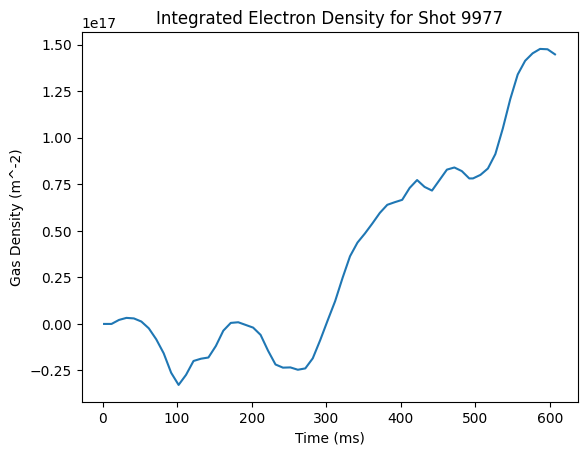

In [10]:
fig,ax = plt.subplots()
ax.plot(tdms_file['Data']['Time'][:], data['ne']*0.25)
# ax.plot(tdms_file['Data']['Time'][:], data['gas_density_smooth'], label='Smoothed')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Gas Density (m^-2)")
ax.set_title(f"Integrated Electron Density for Shot {shot}")